In [1]:
import sys
sys.path.append("/Users/ccamargo/Documents/py_scripts/")
import utils_SL as sl 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#%% get budget components
path = '/Volumes/LaCie_NIOZ/data/budget/'
path = '/Users/ccamargo/Desktop/manuscript_SLB/data/'
dic = pd.read_pickle(path+'budget_v2.pkl')

In [3]:
key = 'som'
mask = np.array(dic[key]['mask'])


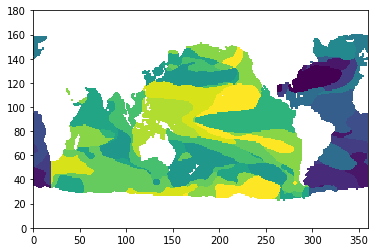

In [4]:
plt.pcolor(mask)

510070945.90578073


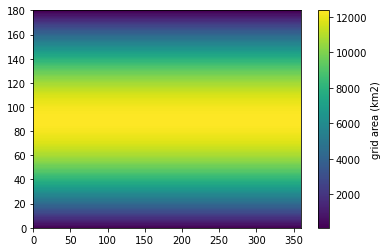

In [5]:
grid_area = sl.get_grid_area(mask)
plt.pcolor(grid_area)
print(np.sum(grid_area)) # km2
plt.colorbar(label='grid area (km2)')

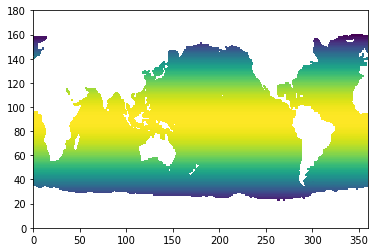

In [6]:
maskbin = np.array(mask)
maskbin[np.isfinite(maskbin)]=1
plt.pcolor(grid_area*maskbin)
total_area = np.nansum(grid_area*maskbin)

In [7]:
n = np.unique(mask[np.isfinite(mask)])
areas = np.zeros((len(n)))
for k,i in enumerate(n):
    msk = np.array(mask)
    msk[msk!=int(i)] = np.nan
    msk[np.isfinite(msk)] = 1
    areas[k] = np.nansum(grid_area*msk)
million = 1e+6
df = pd.DataFrame({'cluster':n,'area_km2':areas,'area_e':areas/million})
df.mean()['area_e']

17.605566210951565

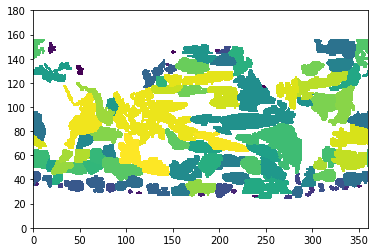

In [8]:
key = 'dmap'
mask = np.array(dic[key]['mask'])
plt.pcolor(mask)
plt.show()
n = np.unique(mask[np.isfinite(mask)])
areas = np.zeros((len(n)))
for k,i in enumerate(n):
    msk = np.array(mask)
    msk[msk!=int(i)] = np.nan
    msk[np.isfinite(msk)] = 1
    areas[k] = np.nansum(grid_area*msk)
million = 1e+6
df2 = pd.DataFrame({'cluster':n,'area_km2':areas,'area_e':areas/million})

In [9]:
print('Thompson aand Merrifield ocean basins varies from 7.3 to 91.4 million km2')

Thompson aand Merrifield ocean basins varies from 7.3 to 91.4 million km2


In [10]:
print('SOM clusters vary from {:.2f} to {:.2f} million km2, with average and total size of {:.2f} and {:.2f} million km2'.format(
df.min()['area_e'],df.max()['area_e'],df.mean()['area_e'],df.sum()['area_e'] ))


SOM clusters vary from 3.84 to 34.51 million km2, with average and total size of 17.61 and 316.90 million km2


In [11]:
print('dMAP clusters vary from {:.2f} to {:.2f} million km2, with average and total size of {:.2f} and {:.2f} million km2'.format(
df2.min()['area_e'],df2.max()['area_e'],df2.mean()['area_e'],df2.sum()['area_e'] ))

dMAP clusters vary from 0.03 to 24.15 million km2, with average and total size of 2.53 and 245.61 million km2


In [12]:
print('1 degree resolution world map has an average grid size of {:.2f} km2, with {:.2f} km2 at Equator, {:.2f} km2 at 60deg and {:.2f} km2 at the poles, and a total size of {:.2f} million km2'.format(
    grid_area.mean(), grid_area[90,0],grid_area[60,0] ,grid_area[0,0],  
    np.nanmean(grid_area), np.nansum(grid_area)/million))


1 degree resolution world map has an average grid size of 7871.47 km2, with 12363.84 km2 at Equator, 10761.35 km2 at 60deg and 107.90 km2 at the poles, and a total size of 7871.47 million km2


In [13]:
mask = np.array(dic['alt']['trend'])
mask[mask<-30] = np.nan
mask[np.isfinite(mask)] = 1

In [14]:
print('1 degree resolution ocean map, cut at 66 deg lat, has an average grid size of {:.2f} km2 and total {:.2f} million km2'.format(
    np.nanmean(grid_area*mask), np.nansum(grid_area*mask)/million))


1 degree resolution ocean map, cut at 66 deg lat, has an average grid size of 9911.69 km2 and total 338.63 million km2


In [15]:
df3=df2
df3['cluster'] = df2['cluster']+len(df)
df3 = df.append(df3)


print('dMAP and SOM clusters vary from {:.2f} to {:.2f} million km2, with average and total size of {:.2f} and {:.2f} million km2'.format(
df3.min()['area_e'],df3.max()['area_e'],df3.mean()['area_e'],df3.sum()['area_e'] ))



dMAP and SOM clusters vary from 0.03 to 34.51 million km2, with average and total size of 4.89 and 562.51 million km2


In [16]:
df3

,cluster,area_km2,area_e
0,1.0,8.509807e+06,8.509807
1,2.0,8.406024e+06,8.406024
2,3.0,6.995311e+06,6.995311
3,4.0,1.117463e+07,11.174626
4,5.0,1.097012e+07,10.970122
...,...,...,...
92,111.0,5.398897e+06,5.398897
93,112.0,2.414631e+07,24.146309
94,113.0,9.978557e+06,9.978557
95,114.0,4.898057e+06,4.898057
